In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
student = pd.read_csv('/content/drive/MyDrive/422Assignment/unprocessed_dataset_with_nulls.csv')

# **Data Processing**

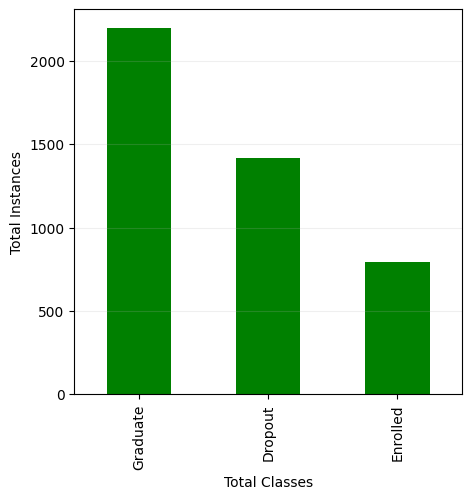

In [ ]:
counter= student["Target"].value_counts()
plt.figure(figsize=(5,5))
counter.plot(kind="bar", color="green")
plt.xlabel("Total Classes")
plt.ylabel("Total Instances")
plt.grid(axis='y', linestyle='-', alpha=.2)

In [ ]:
#Removing Null Values
student_subset = student
for i in student.columns:
  student_subset = student_subset[student_subset[i].notnull()]

In [ ]:
#Fxing column Name
student_subset.rename(columns = {'Nacionality':'Nationality'}, inplace = True)

In [ ]:
# Mapping nationalities
unique_countries = student_subset['Nationality'].unique()
unique_countries = [country for country in unique_countries if country != 'Bangladesh']
country_mapping = {'Bangladesh': 1.0}
country_mapping.update({country: float(random.choice(range(2, 9))) for country in unique_countries})
student_subset['Nationality'] = student_subset['Nationality'].map(country_mapping)

In [ ]:
student_subset = student_subset.drop(student_subset[student_subset['Target'].str.contains('Enrolled', na=False)].index)
student_subset["Target"].value_counts()

,count
Target,
Graduate,1823
Dropout,1206


In [ ]:
#Target Mapping
student_subset['Target'] = student_subset['Target'].map({
    'Dropout':1,
    'Graduate':0
})

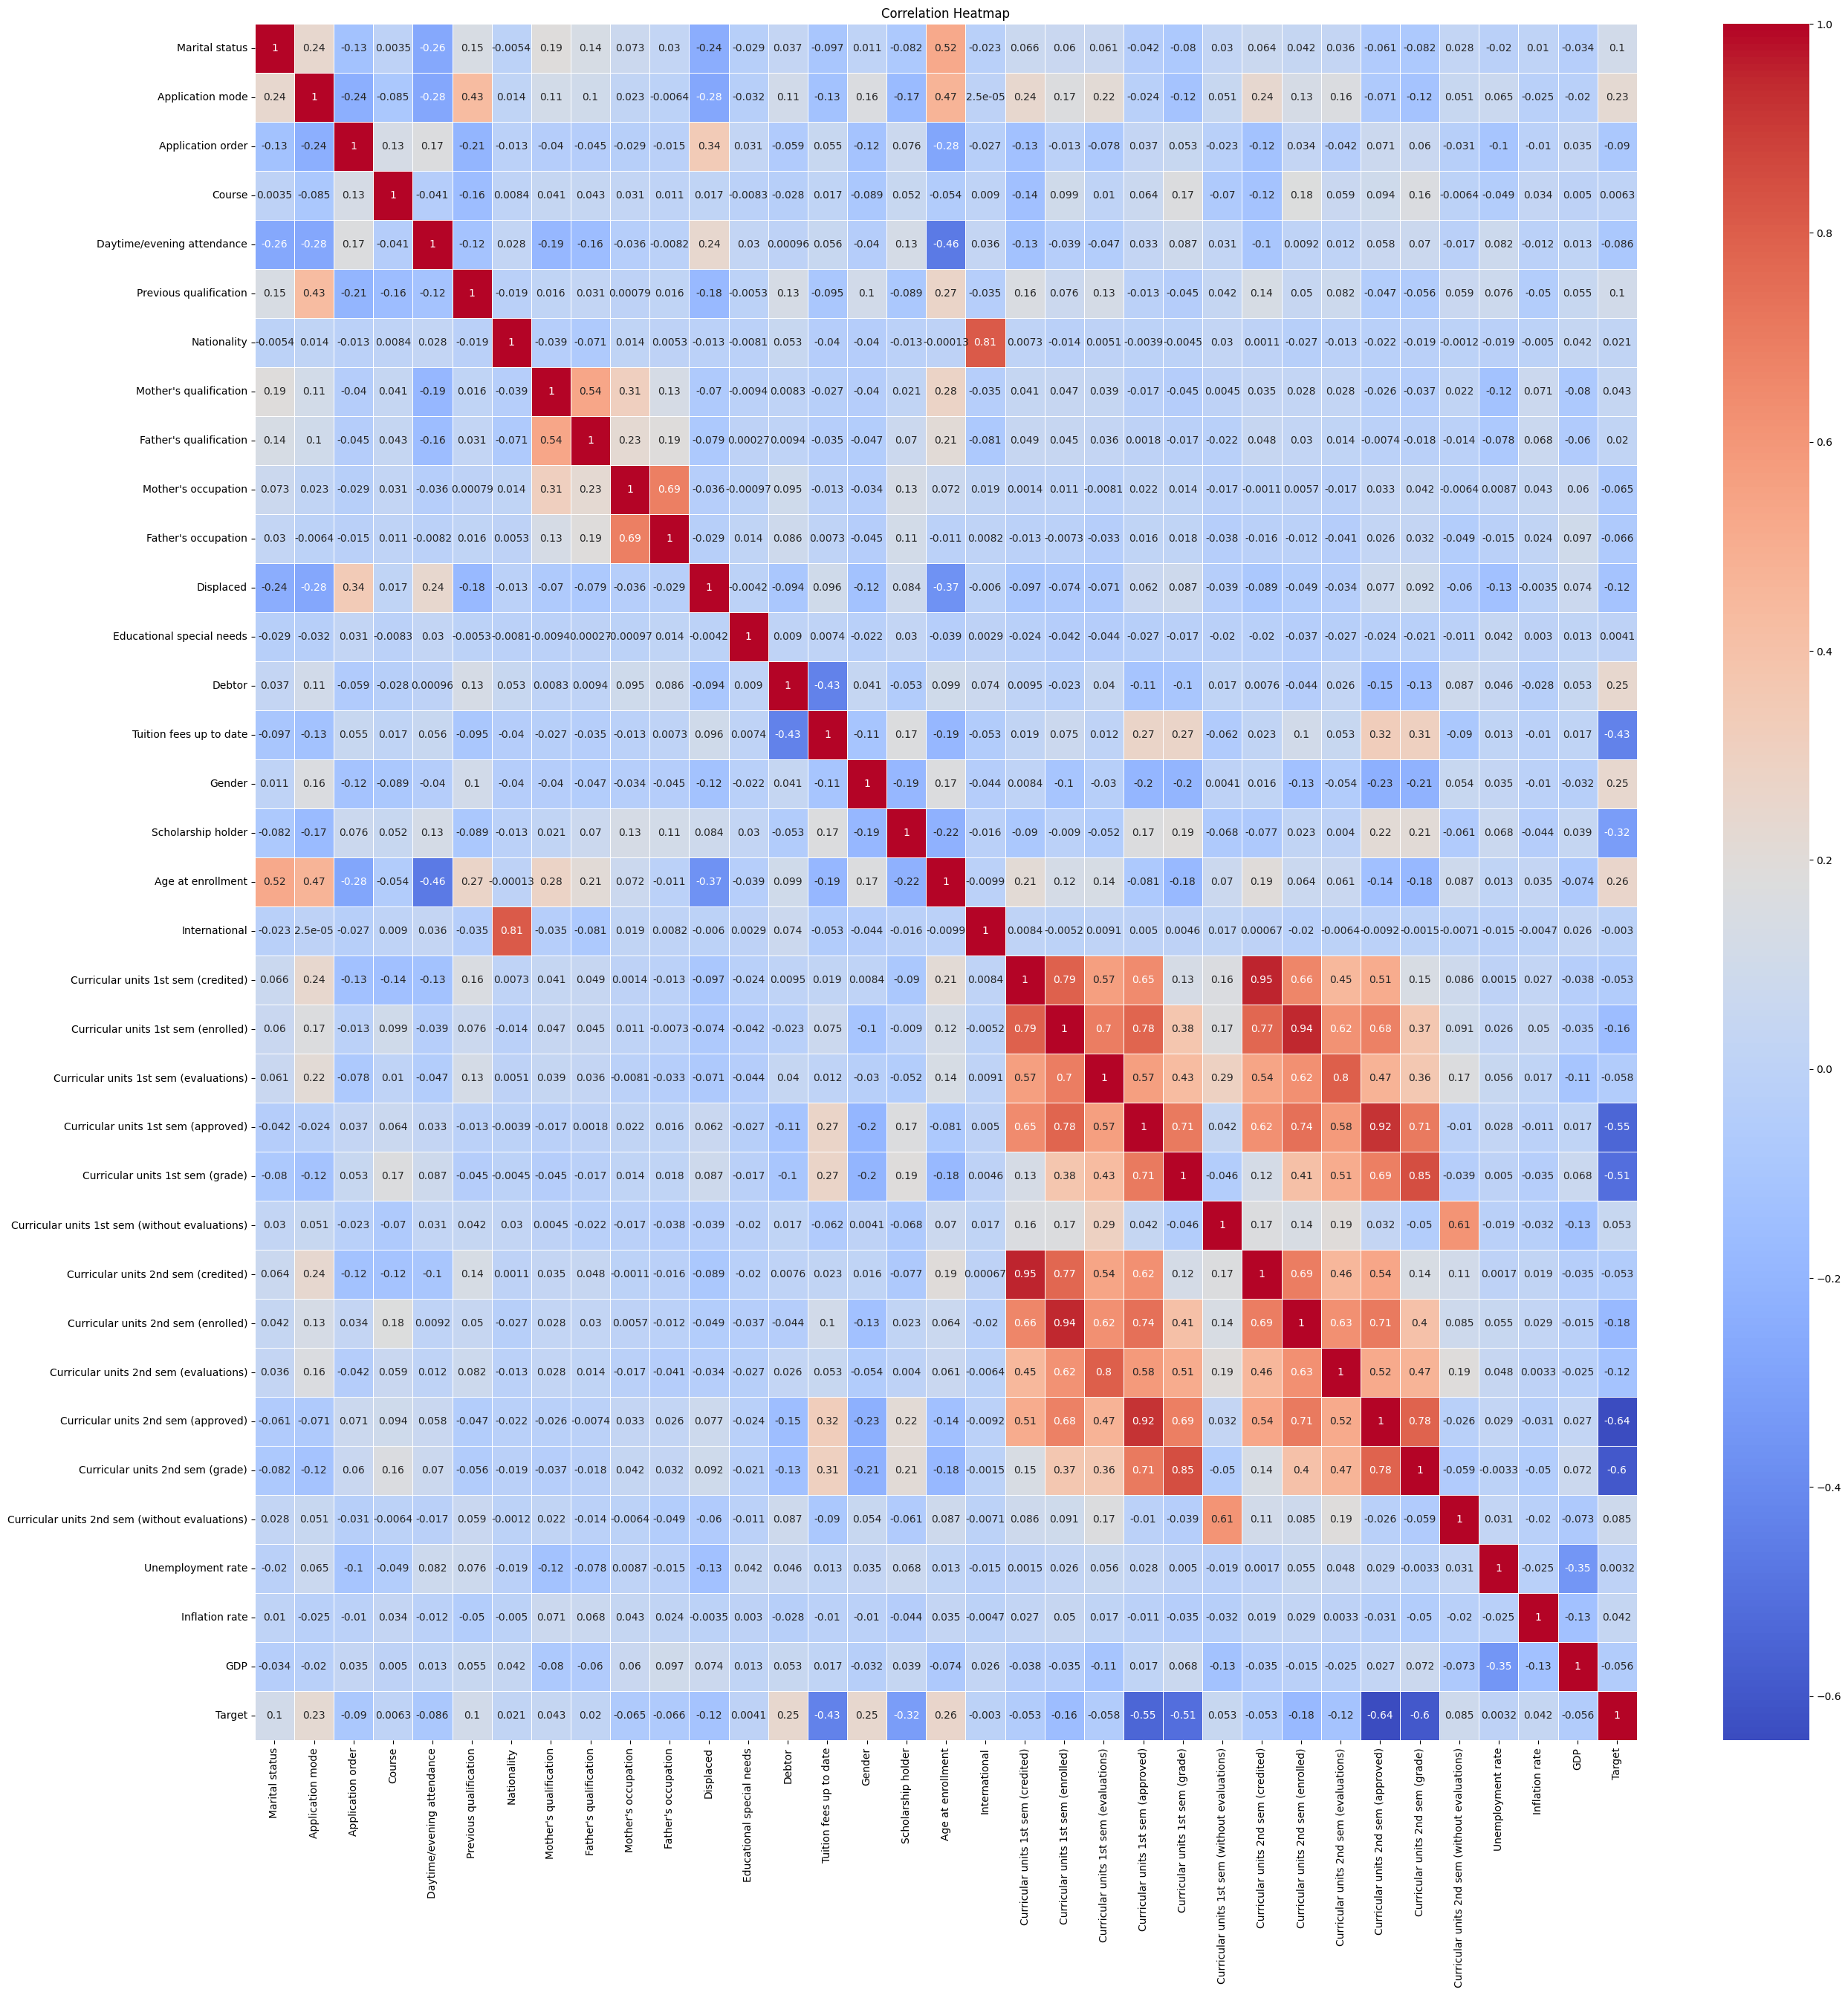

In [ ]:
#Genarating Heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(student_subset.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Dropping unnecessary Data and correlated data
student_subset = student_subset.drop(columns=
["Application order",
"Application mode",
"Curricular units 1st sem (credited)",
"Curricular units 1st sem (evaluations)",
"Curricular units 1st sem (without evaluations)",
"Curricular units 2nd sem (credited)",
"Curricular units 2nd sem (evaluations)",
"Curricular units 2nd sem (without evaluations)",
 "International", "Curricular units 1st sem (enrolled)",
 "Curricular units 1st sem (approved)", "Curricular units 2nd sem (approved)",
 "Curricular units 2nd sem (enrolled)"], axis=1)

## **Feature Scaling**

In [ ]:
#Feature Scaling using Minimax
from sklearn.preprocessing import MinMaxScaler
scaled_columns = ["Age at enrollment","Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)",
                  "Unemployment rate",
                  "Inflation rate","GDP"]

for i in student_subset.columns:
  if i in scaled_columns:
    data = student_subset[[i]]
    scaler = MinMaxScaler()
    student_subset[i] = scaler.fit_transform(data)

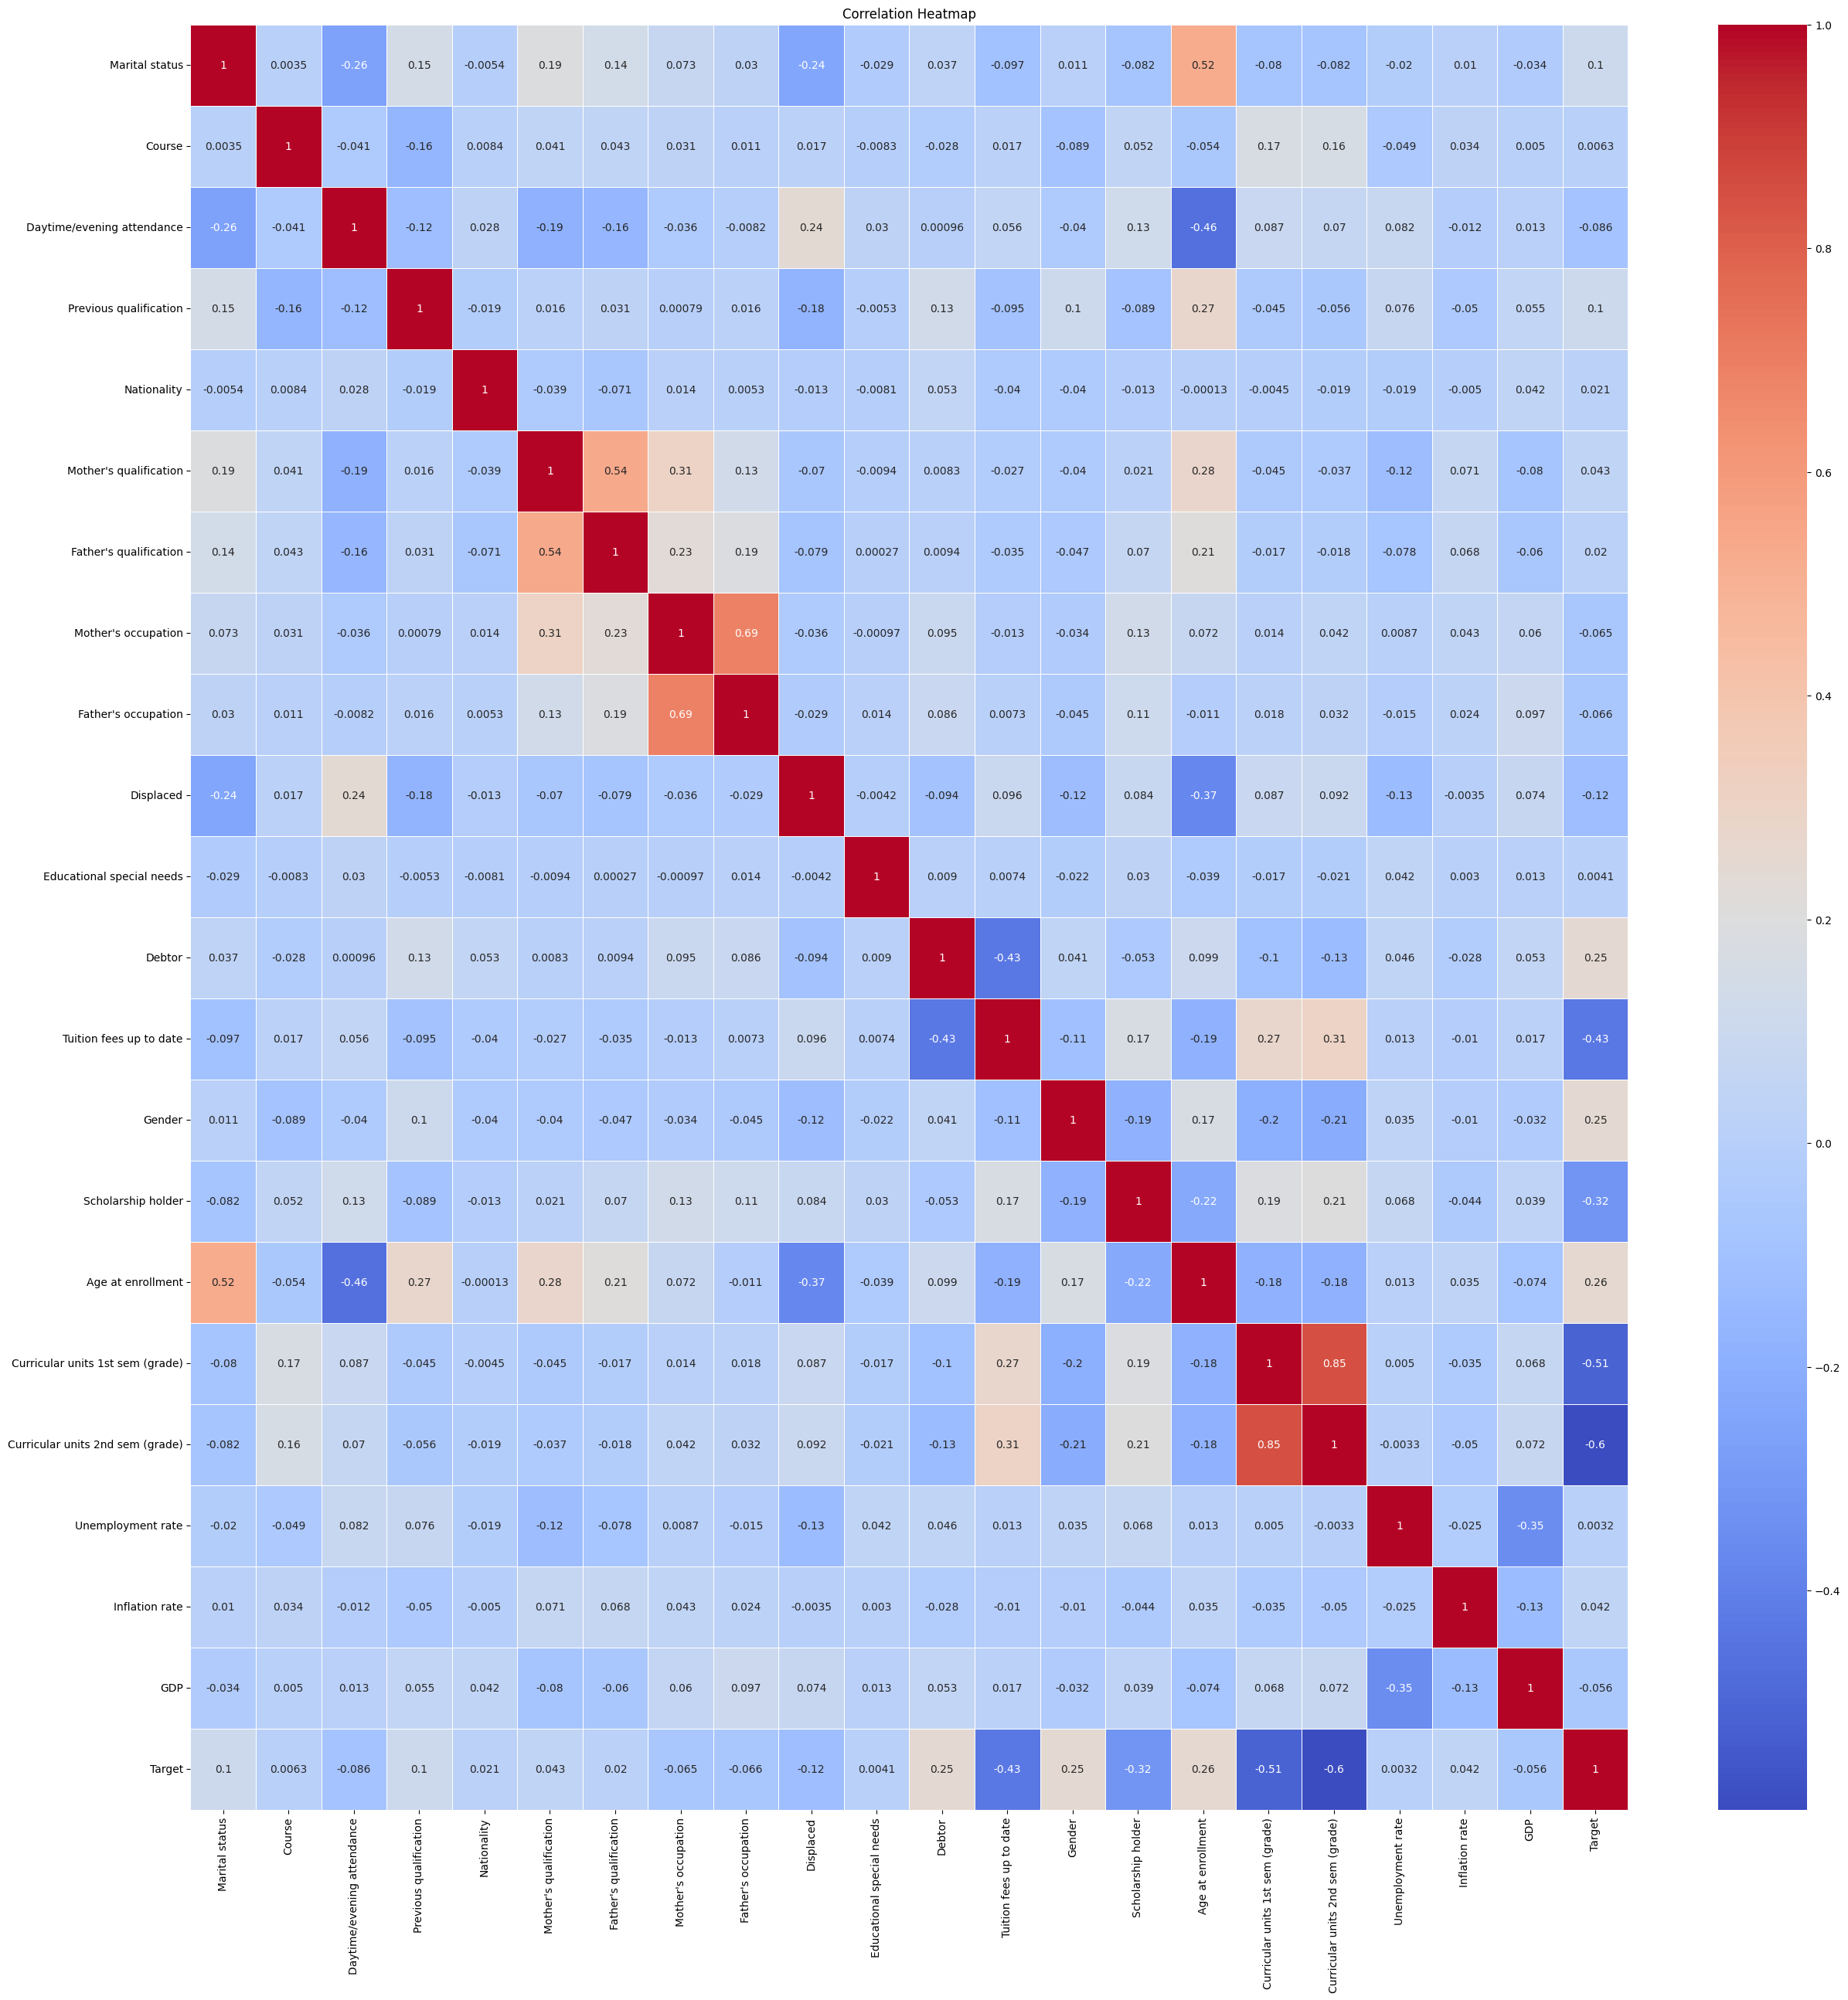

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(student_subset.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## **Data Set Spliting**

In [ ]:
#Train and Test Split
from sklearn.model_selection import train_test_split
X = student_subset.drop(columns=['Target'])
Y = student_subset['Target']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state=1)

### **Data Set Model Training**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [ ]:
#Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_test = np.mean(y_pred_nb == y_test)
print("Test set score: {:.2f}".format(nb_test))

Test set score: 0.83


In [ ]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_logistic = model.predict(X_test)

logistic_test = np.mean(y_pred_logistic == y_test)
print("Test set score: {:.2f}".format(logistic_test))

Test set score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Decision Tree
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')  # You can tune other hyperparameters as well
dt.fit(X_train, y_train)

y_pred_decisionTree = dt.predict(X_test)

decisionTree_test = np.mean(y_pred_decisionTree == y_test)
print("Test set score: {:.2f}".format(decisionTree_test))

Test set score: 0.80


### **Comparison**

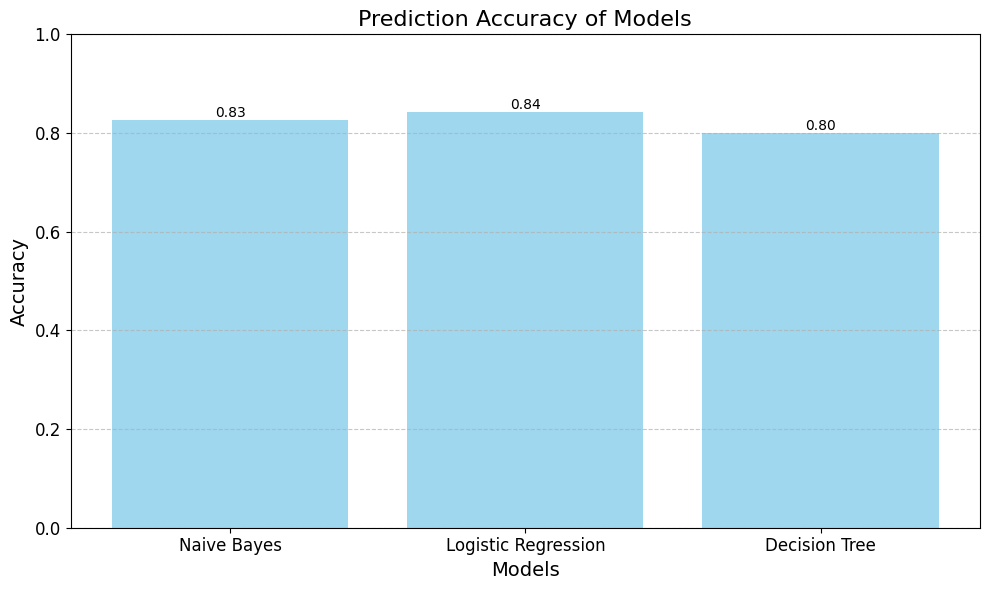

In [ ]:
model_names = ['Naive Bayes', 'Logistic Regression', 'Decision Tree']
model_accuracies = [nb_test, logistic_test, decisionTree_test]
# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, model_accuracies, color='skyblue', alpha=0.8)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha='center',
        va='bottom'
    )

plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Prediction Accuracy of Models', fontsize=16)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Comparing Confusion Matrix, Precision and Recall
print("Naive Bayes")
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(nb_conf_matrix)


nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')

print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")



print("\nLogistic Regression")
logistic_conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix:")
print(logistic_conf_matrix)


logistic_precision = precision_score(y_test, y_pred_logistic, average='weighted')
logistic_recall = recall_score(y_test, y_pred_logistic, average='weighted')

print(f"Precision: {logistic_precision:.2f}")
print(f"Recall: {logistic_recall:.2f}")



print("\nDecision Tree Classfier")
decisionTree_conf_matrix = confusion_matrix(y_test, y_pred_decisionTree)
print("Confusion Matrix:")
print(decisionTree_conf_matrix)


decisionTree_precision = precision_score(y_test, y_pred_decisionTree, average='weighted')
decisionTree_recall = recall_score(y_test, y_pred_decisionTree, average='weighted')

print(f"Precision: {decisionTree_precision:.2f}")
print(f"Recall: {decisionTree_recall:.2f}")

Naive Bayes
Confusion Matrix:
[[488  64]
 [ 93 264]]
Precision: 0.83
Recall: 0.83

Logistic Regression
Confusion Matrix:
[[510  42]
 [101 256]]
Precision: 0.84
Recall: 0.84

Decision Tree Classfier
Confusion Matrix:
[[459  93]
 [ 88 269]]
Precision: 0.80
Recall: 0.80
